In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weight-height.csv - weight-height.csv.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [6]:
df.nunique()

Gender       2
Height    8555
Weight    8555
dtype: int64

In [7]:
df.shape

(8555, 3)

In [8]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


<AxesSubplot:>

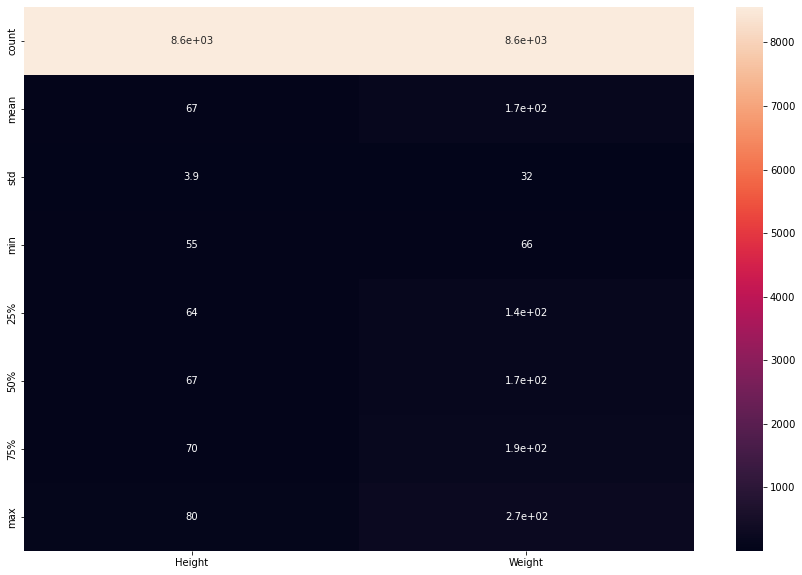

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe(), annot=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
m = LabelEncoder()

In [12]:
df.Gender = m.fit_transform(df['Gender'])

In [13]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
ms = MinMaxScaler()

In [16]:
df['Height'] = ms.fit_transform(df[['Height']])

In [17]:
df['Weight'] = ms.fit_transform(df[['Weight']])

In [18]:
df.head()

,Gender,Height,Weight
0,1,0.744399,0.862415
1,1,0.548328,0.472703
2,1,0.754583,0.719657
3,1,0.662487,0.755412
4,1,0.590905,0.688360


In [19]:
x = df.drop('Weight', axis = 1,)

In [20]:
y = df['Weight']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=101)

# KNN Regression

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
knn = KNeighborsRegressor(n_neighbors=1)

In [25]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [26]:
y_pred = knn.predict(x_test)

In [27]:
y_pred

array([0.53978378, 0.40578476, 0.3306123 , ..., 0.33565384, 0.51997429,
       0.49240951])

In [28]:
np.array(y_test)

array([0.51520488, 0.43492279, 0.39785089, ..., 0.30360302, 0.46321374,
       0.64009357])

In [29]:
from sklearn import metrics

In [30]:
metrics.mean_squared_error(y_test,y_pred)

0.004988265652042867

In [31]:
metrics.mean_absolute_error(y_test,y_pred)

0.05575577783338965

In [32]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.07062765500880563

In [33]:
from sklearn.metrics import accuracy_score, r2_score

In [34]:
#accuracy_score(y_test,y_pred)

In [35]:
r2_score(y_test,y_pred)

0.797040694536056

In [36]:
knn.score(x_test,y_test)

0.797040694536056

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
lr.predict(x_test)

array([0.51951292, 0.41264904, 0.36639052, ..., 0.33086335, 0.51552564,
       0.55033521])

In [41]:
np.array(y_test)

array([0.51520488, 0.43492279, 0.39785089, ..., 0.30360302, 0.46321374,
       0.64009357])

In [42]:
lr.score(x_test,y_test)

0.8982091850005034

In [43]:
from sklearn.metrics import r2_score

In [44]:
score = r2_score(y_test,y_pred)

In [45]:
score

0.797040694536056